<div style="width:100%;text-align: center;"> 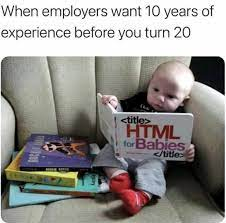 </div>

# <h1 style='background:#cb865b; border:0; color:white'><center>📚EDA: Amazon Data Science Books</center></h1> 

# **<span style="color:#ff9756;">📰About the Dataset</span>**

The dataset contains 946 books obtained from scraping Amazon books related to data science, statistics, data analysis, Python, deep learning, and machine learning.

There are 18 columns:

title: title of the book

author: author (or the authors) of the book

price: price (in dollars)

pages: number of pages

avg_reviews: average reviews (out of 5)

n_reviews: reviews done for each book

star5: percentage of 5 star reviews

star4: percentage of 4 star reviews

star3: percentage of 3 star reviews

star2: percentage of 2 star reviews

star1: percentage of 1 star reviews

dimensions: size of the book (in inches)

weight: weight (in pounds or ounces)

language: language of the book

publisher: publisher

ISBN-13: ISBN_13 code

link: link of the Amazon book

complete_link: complete link of the Amazon book

In [ ]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Custom Colors
class clr:
    S = '\033[1m' + '\033[96m'
    E = '\033[0m'
    
my_colors = ["#cb865b", "#efc088", "#ffba01", "#7e573d", "#ff9756"]

print(clr.S + "Notebook Color Scheme: " + clr.E)
sns.palplot(sns.color_palette(my_colors))

In [ ]:
#Environment check
import os
import warnings
warnings.filterwarnings("ignore")

# **<span style="color:#ff9756;">📖Let's get the Data</span>**

In [ ]:
df = pd.read_csv('/kaggle/input/amazon-data-science-books/final_book_dataset_kaggle.csv')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull().any()

In [ ]:
# Find null values and drop them

df.replace('Nan', np.nan, inplace = True)


In [ ]:
df.dropna(axis = 0, inplace = True)

In [ ]:
df.columns

# **<span style="color:#ff9756;">🥽Let's see what all we can explore in this dataset</span>**

> 1. Which book (title) recieved max reviews?

> 2. Which book has most percentage of 5 stars?

> 3. Which publisher is most famous?

> 4. Which language is most preffered by readers?

> 5. What are the average number of pages in a data science book and the costliest book?

> 6. Plot average reviews

<div style="width:100%;text-align: center;"> <img align=middle src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSA_Xzo-lworWNHN1gSdum9rQUU7fWu24MlP99XszewySvZvUbblURRxJ8rjuJ_aoPSa-Q&usqp=CAU" alt="Heat beating" style="height:366px;margin-top:3rem;"> </div>

## **<span style="color:#cb865b;">1️⃣Which book (title) recieved max reviews?</span>**

In [ ]:
max_reviews = df['n_reviews'].max() 
review_book = df.loc[df['n_reviews'] == max_reviews, 'title'].iloc[0]
print(review_book, 'is the most reviewed book with max ', max_reviews, 'reviews')

In [ ]:
plt.figure(figsize=(20,20))
sns.barplot(x='n_reviews',y='title', data = df.head(20))
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.yticks(fontsize= 6)
plt.ylabel('Book Title')
plt.xlabel('Number of Reviews')
plt.title('Number of reviews per book')

## **<span style="color:#cb865b;">2️⃣Which book has most percentage of 5 stars?</span>**

In [ ]:
five_star = df['star5'].max()
five_star_book = df.loc[df['star5'] == five_star, 'title'].iloc[0]

print(five_star_book, ' got most percentage of 5 stars (', five_star, ')')

In [ ]:
# Let's find out the number of reviews goto by the book to support our theory
n_reviews_five_star_book = df.loc[df['title'] == five_star_book, 'n_reviews'].iloc[0]
print(five_star_book, 'got ',n_reviews_five_star_book, ' reviews out of which 5 stars were ', five_star )

**<span style="color:#ffba01;">Since, 5 reviews are too small to say that most percent of 5 stars were actually a worth or not. Let's check percent of 5 stars on boo with most reviews.</span>**

In [ ]:
maximum_reviews = df['n_reviews'].max()
five_star_on_max_n_reviews_book = df.loc[df['title'] == review_book, 'star5'].iloc[0]
print(review_book, 'got', five_star_on_max_n_reviews_book, 'percent of 5 stars and ', maximum_reviews, 'reviews')

**<span style="color:#ffba01;">Thus, we found that the book with max reviews do have around 81% of 5 stars which is pretty good for a book.</span>**

In [ ]:
plt.figure(figsize=(20,20))
sns.barplot(x='star5',y='title', data = df.head(50))
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.yticks(fontsize= 6)
plt.ylabel('Book Title')
plt.xlabel('Rating')
plt.title('Books with 5 star rating')

**<span style="color:#ffba01;">We have quite a lot of books with more than 60% of 5 stars.</span>**

## **<span style="color:#cb865b;">3️⃣Which publisher and author is most famous?</span>**

**<span style="color:#ffba01;">For this, we will compare publishers and authors to number of reviews (more the number of reviews, more the book is being read by readers).</span>**

In [ ]:
# Publishers vs n_reviews (max and min)
most_reviewed = df['n_reviews'].max()
star_publisher = df.loc[df['n_reviews'] == most_reviewed, 'publisher'].iloc[0]

print(star_publisher, ' got maximum number of reviews (', most_reviewed, ')')


In [ ]:
least_reviewed = df['n_reviews'].min()
_publisher = df.loc[df['n_reviews'] == most_reviewed, 'publisher'].iloc[0]

print(_publisher, ' got minimum number of reviews (', least_reviewed, ')')

In [ ]:
plt.figure(figsize=(15,8))
sns.catplot(x = 'n_reviews', y = 'publisher',data = df.head(50), kind = 'swarm', color = my_colors[2])
plt.yticks(fontsize= 6)
plt.ylabel('Publisher')
plt.xlabel('number of reviews')
plt.title('Publishers and number of reviews per their books')

**<span style="color:#ffba01;">This comparision is pretty weak, as we see that there are bare minimum number of publishers whose books even made it to more 500 reviews.</span>**

In [ ]:
# Authors vs n_reviews (max and min)
most_reviewed = df['n_reviews'].max()
star_author = df.loc[df['n_reviews'] == most_reviewed, 'author'].iloc[0]

print(star_author, ' got maximum number of reviews (', most_reviewed, ')')

In [ ]:
least_reviewed = df['n_reviews'].min()
_author = df.loc[df['n_reviews'] == least_reviewed, 'author'].iloc[0]

print(_author, ' got least number of reviews (', least_reviewed, ')')

In [ ]:
plt.figure(figsize=(100, 80))
sns.catplot(x = 'n_reviews', y = 'author',data = df.head(20), kind = 'bar', color = my_colors[3])
plt.yticks(fontsize= 6)
plt.ylabel('author')
plt.xlabel('number of reviews')
plt.title('Authors and number of reviews per their books')

**<span style="color:#ffba01;">Fewer number of authors made it to even over 2000 reviews. But this plot depicts just top 10 authors.</span>**

## **<span style="color:#cb865b;">4️⃣Which language is most preffered by readers?</span>**

<div style="width:100%;text-align: center;"> <img align=middle src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTOj6-gnTnmrPpPzV7nkZpcAH6JfT0jqxfD3g&usqp=CAU" alt="Heat beating" style="height:366px;margin-top:3rem;"> </div>

In [ ]:
df['language'].unique()

In [ ]:
preffered_language = df['language'].value_counts()
preffered_language

In [ ]:
plt.figure(figsize=(15,8))
plt.bar(preffered_language.index, preffered_language, color = my_colors[4])
plt.show()

**<span style="color:#ffba01;">Clearly, English is the most preffered language. Followed by Spanish</span>**

## **<span style="color:#cb865b;">5️⃣What are the average number of pages in a data science book and the costliest book?</span>**

In [ ]:
average_no_pages = df['pages'].mean().round()
print('Average pages per book are - ',average_no_pages)

In [ ]:
plt.figure(figsize=(20, 20))
sns.catplot(x = 'pages', y = 'title',data = df.head(20), kind = 'bar', color = my_colors[0])
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.yticks(fontsize= 6)
plt.ylabel('title')
plt.xlabel('pages')
plt.title('Title and number of pages')

## **<span style="color:#ffba01;">Least and most priced Book</span>**

In [ ]:
costliest = df['price'].max()
costliest_book = df.loc[df['price'] == costliest, 'title'].iloc[0]

print(costliest_book, 'is the costliest book priced at $', costliest)

In [ ]:
least_cost = df['price'].min()
least_costliest_book = df.loc[df['price'] == least_cost, 'title'].iloc[0]

print(least_costliest_book, 'is the costliest book priced at $', least_cost)

In [ ]:
plt.figure(figsize=(15,8))
sns.catplot(x = 'price', y = 'title',data = df.head(20), kind = 'swarm', color = my_colors[1])
plt.yticks(fontsize= 6)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.ylabel('title')
plt.xlabel('price in $')
plt.title('Title and its price')

## **<span style="color:#cb865b;">6️⃣Plot average reviews</span>**

In [ ]:
df.columns

In [ ]:
plt.figure(figsize=(15,8))
#plt.bar(df['avg_reviews'].index, df['avg_reviews'], color = my_colors[4])
df['avg_reviews'].plot(color = my_colors[2])
plt.xlabel('count')
plt.ylabel('reviews')
plt.show()

**<span style="color:#ffba01;">From the above plot it is evident that average reviews lie in range 3.5 to 5. </span>**

# **<span style="color:#DA291C;">🤘Conclusion</span>**

> **This marks the end of 📚EDA: Amazon Data Science Books**

> **Stay Tuned for more..**

> **Please share your feedback and suggestions and help me improve 😇**

<div style="width:100%;text-align: center;"> <img align=middle src="https://www.careerguide.com/career/wp-content/uploads/2021/07/book-gif.gif" alt="Heat beating" style="height:366px;margin-top:3rem;"> </div>